# Decision Tree

In [7]:
'''loading reqired packages'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
'''importing data set'''
import pandas as pd
df = pd.read_csv(r"C:\Users\midhu\Downloads\heart_disease.csv")
df.shape

(908, 13)

In [10]:
df.head

<bound method NDFrame.head of      age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               th

# Exploratory Data Analysis

In [11]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [12]:
# Check for outliers
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


# Data Visualization

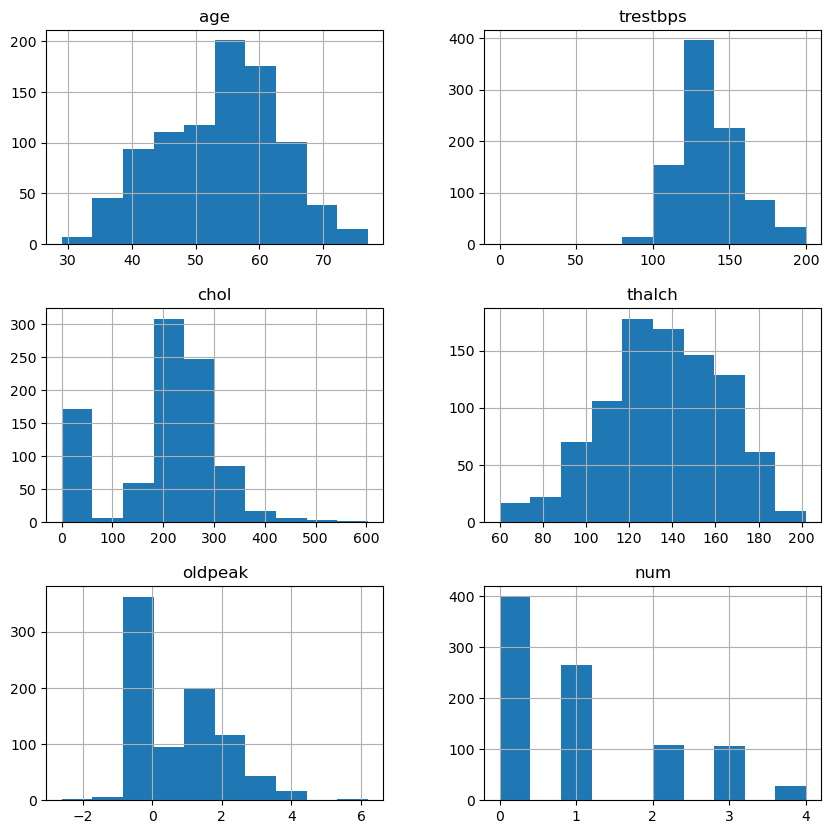

In [13]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10), bins=10)
plt.show()

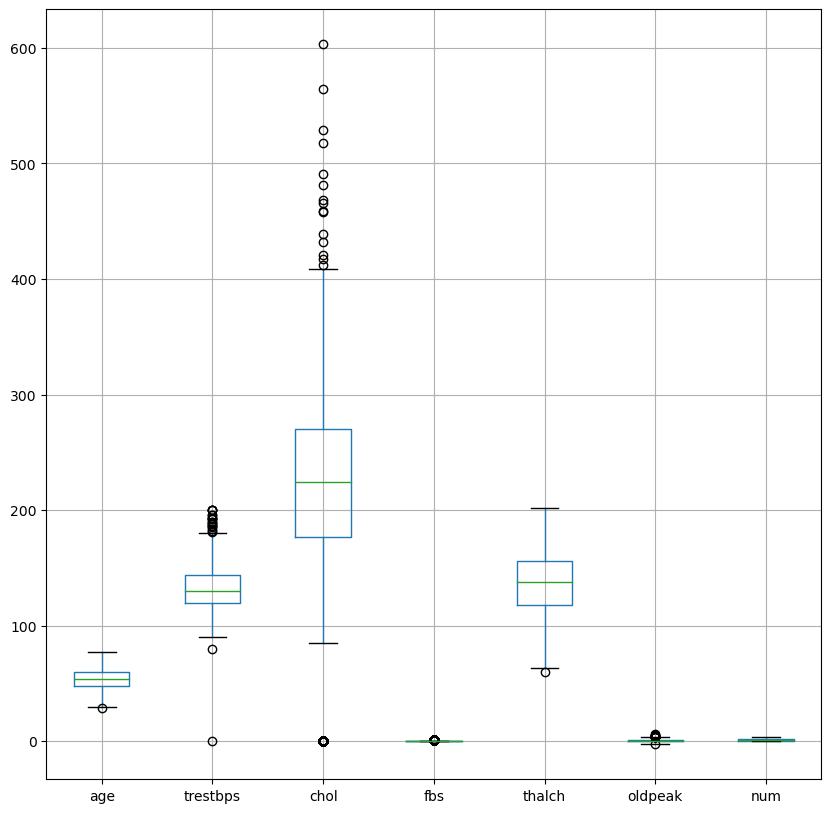

In [14]:
'''box plot'''
df.boxplot(figsize=(10, 10))
plt.show()

# correlation metrices

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [16]:
# Correlation matrix for numerical variables
num_corr = df[num_cols].corr()

In [17]:
# Display the correlation matrix
print("Correlation matrix for numerical variables:")
display(num_corr)

Correlation matrix for numerical variables:


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


# Feature Engineering

In [18]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [19]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,1,0,0,1,0,0,0,0,0,0,0,0
1,41,135,203,False,132,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0
2,57,140,192,False,148,0.4,0,1,0,0,0,1,0,0,0,1,0,0,0
3,52,118,186,False,190,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,57,110,201,False,126,1.5,0,1,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,1,0,0,0,1,0,0,0,0,1,0,1
904,62,166,170,False,120,3.0,4,1,0,0,0,0,1,1,0,1,0,1,0
905,56,170,0,False,123,2.5,4,1,0,1,0,0,0,1,0,0,0,1,0
906,56,144,208,True,105,NaN,4,1,0,1,0,0,1,0,1,0,0,1,0


In [20]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))


In [21]:
# Handling missing values
df.fillna(df.mean(), inplace=True)

In [22]:

# Check for missing values
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_TRUE                  0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

# Decision Tree Classification

Converting the target variable to a classification variable

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [24]:
import pandas as pd
df = pd.get_dummies(df, drop_first=True)
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_TRUE                  0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [25]:
# Split the dataset into training and testing 
df['num'] = (df['num'] > 0).astype(int)
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Implement a Decision Tree Classification model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Create an imputer object
imputer = SimpleImputer(strategy='mean')
# Train the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

In [28]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7307692307692307
Precision: 0.7248037676609105
Recall: 0.7307692307692307
F1 Score: 0.7275852493081423
ROC-AUC: 0.6271695052716951


# Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}

In [30]:
# Create a DecisionTreeClassifier instance
dt_clf = DecisionTreeClassifier()

In [31]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

In [32]:
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 5, 10]})

In [33]:
# Get the best hyperparameters
best_params = grid_search.best_params_


In [34]:
# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [35]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)


In [36]:

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285


# Model Evaluation and Analysis

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model
and identify important features


In [37]:
import matplotlib.pyplot as plt
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[117  20]
 [ 31  14]]


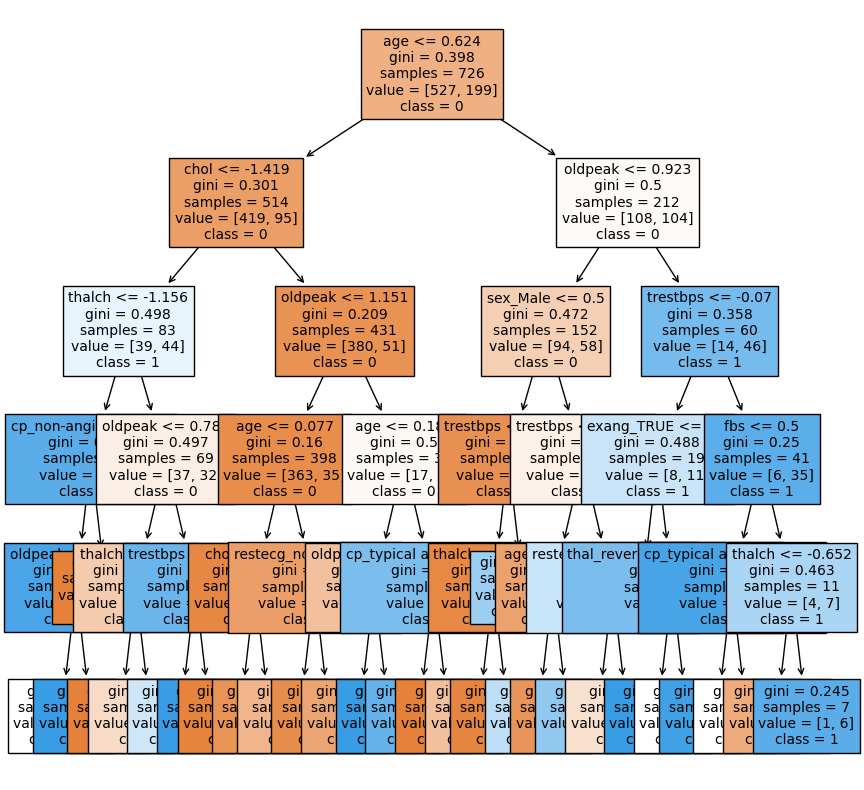

In [38]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], fontsize=10, filled=True)
plt.show()

In [39]:
# Feature importance
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

age: 0.2713264545979258
trestbps: 0.09142079631138433
chol: 0.18617162333655157
fbs: 0.010743333122724288
thalch: 0.059226208257954466
oldpeak: 0.23195265504479815
sex_Male: 0.0553546623546398
cp_atypical angina: 0.0
cp_non-anginal: 0.011975007431465262
cp_typical angina: 0.015377502177669885
restecg_normal: 0.040676604307905775
restecg_st-t abnormality: 0.0
exang_TRUE: 0.014423843929237476
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.011351309127743105


# Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision trees come with several hyperparameters that significantly impact their performance and behavior:

Max Depth: Limits the maximum depth of the tree. Shallow trees may underfit the data, while very deep trees can overfit.

Min Samples Split: The minimum number of samples required to split an internal node. A higher value can prevent overfitting, 
but might cause underfitting if set too high.

Min Samples Leaf: The minimum number of samples that must be present in a leaf node. Like min_samples_split,
    higher values can help reduce overfitting.

Max Features: The number of features to consider when looking for the best split. Reducing the number of features can help in controlling overfitting 
    and improve generalization.

Criterion: The function used to measure the quality of a split. Common options are 'gini' for the Gini impurity and 'entropy' for information gain.

Max Leaf Nodes: Limits the number of leaf nodes in the tree, which can also help in controlling the growth of the tree and prevent overfitting.

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding
How It Works: Assigns a unique integer to each category.

Use Case: When there is an inherent ordinal relationship between categories (e.g., "Small", "Medium", "Large").

Example: {'Small': 0, 'Medium': 1, 'Large': 2}

Pros: Simpler, uses less memory.

Cons: Can unintentionally introduce ordinal relationships where none exist.

One-Hot Encoding
How It Works: Creates a binary column for each category and places a 1 in the column corresponding to each sample’s category.

Use Case: When there is no ordinal relationship between categories.

Example: {'Red': [1, 0, 0], 'Green': [0, 1, 0], 'Blue': [0, 0, 1]}

Pros: Does not assume any ordinal relationship, useful for categorical variables.

Cons: Can lead to high dimensionality if many unique categories exist.

